In [1]:
%matplotlib inline
import runpy
import glob
import os
import traceback
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Confirm working directory (should be the project root)
print('Current working directory:', os.getcwd())

Current working directory: /Users/justinfernandes/dev/screendoor_effect


In [2]:
# Find all python scripts in the current directory (adjust filter as needed)
scripts = sorted([p for p in glob.glob('*.py') if p != 'view_all_plots.ipynb'])
print('Scripts to run:')
for s in scripts:
    print(' -', s)

Scripts to run:
 - 1d_aliasing_clean.py
 - 2d_aliasing_example.py
 - fpa_1d_aliasing_fft_demo.py
 - fpa_artifacts_1d.py
 - fpa_artifacts_1d_downsampled.py
 - simulate_screen_door.py


## Running `1d_aliasing_clean.py`

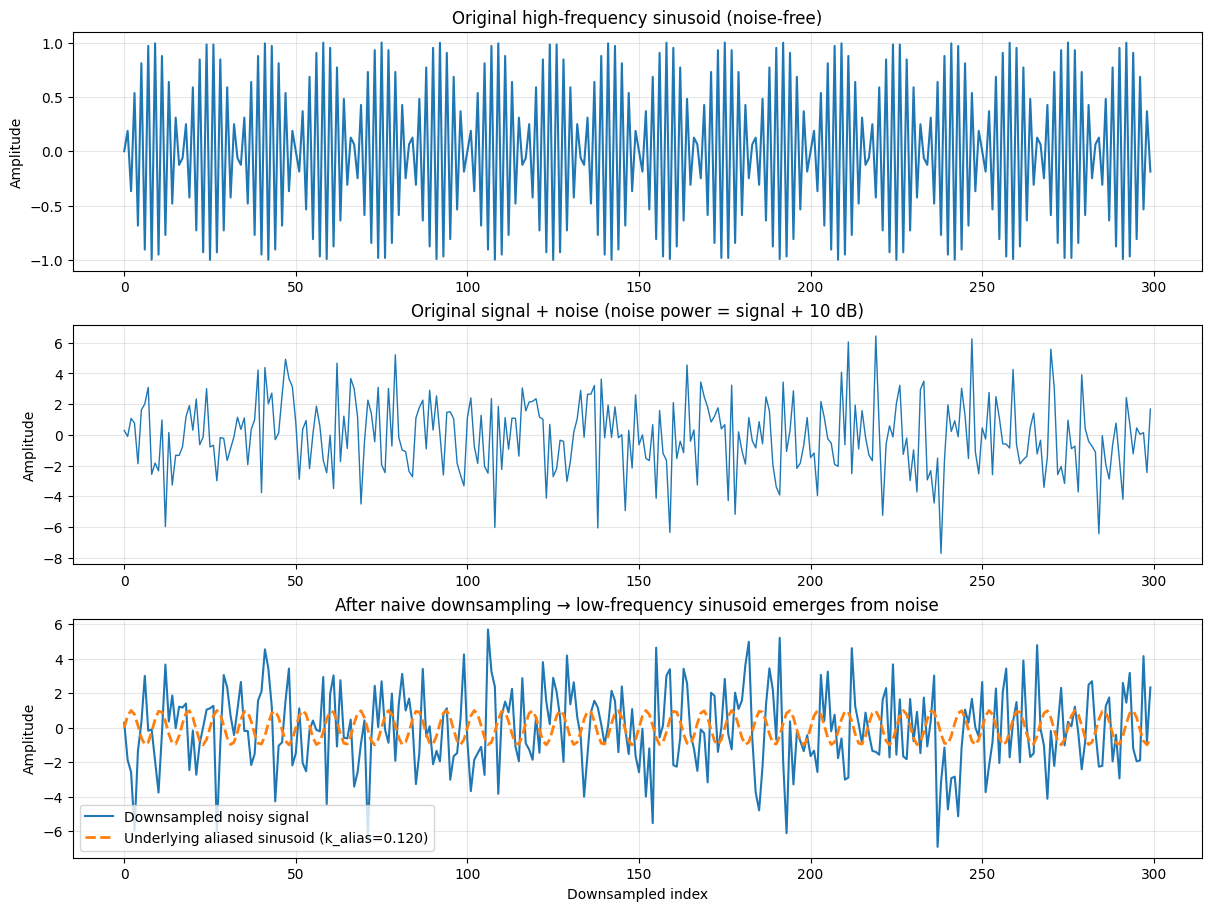

Aliasing + noise summary:
  Original frequency k       = 0.4700 cycles/sample
  Downsample factor D        = 4
  Aliased frequency k_alias  = 0.1200 cycles/sample (downsampled rate)
  Signal power               = 0.5003
  Noise power                = 5.0026  (+10 dB)

Key takeaway:
  Even when broadband noise dominates the full-rate signal,
  deterministic high-frequency structure still aliases into
  a coherent low-frequency sinusoid after downsampling.


## Running `2d_aliasing_example.py`

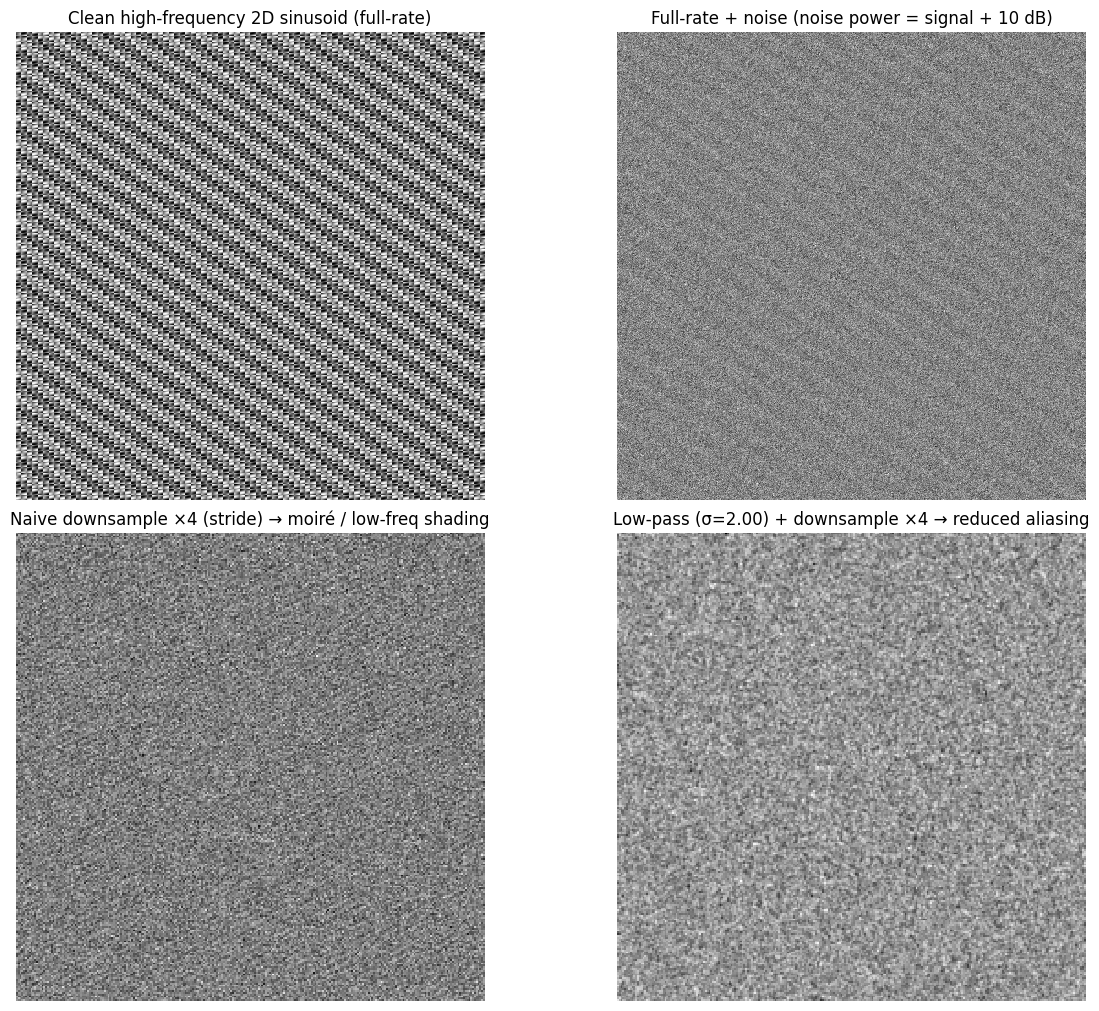

Summary:
  Image size: 1024x1024
  Downsample factor D: 4
  High freqs: kx=0.470, ky=0.440 cycles/pixel (full-rate)
  Example aliased freqs (downsampled rate): kx_alias=0.120, ky_alias=0.240 cycles/pixel
  Signal power: 0.6800
  Noise power : 6.7998 (+10 dB)


## Running `fpa_1d_aliasing_fft_demo.py`

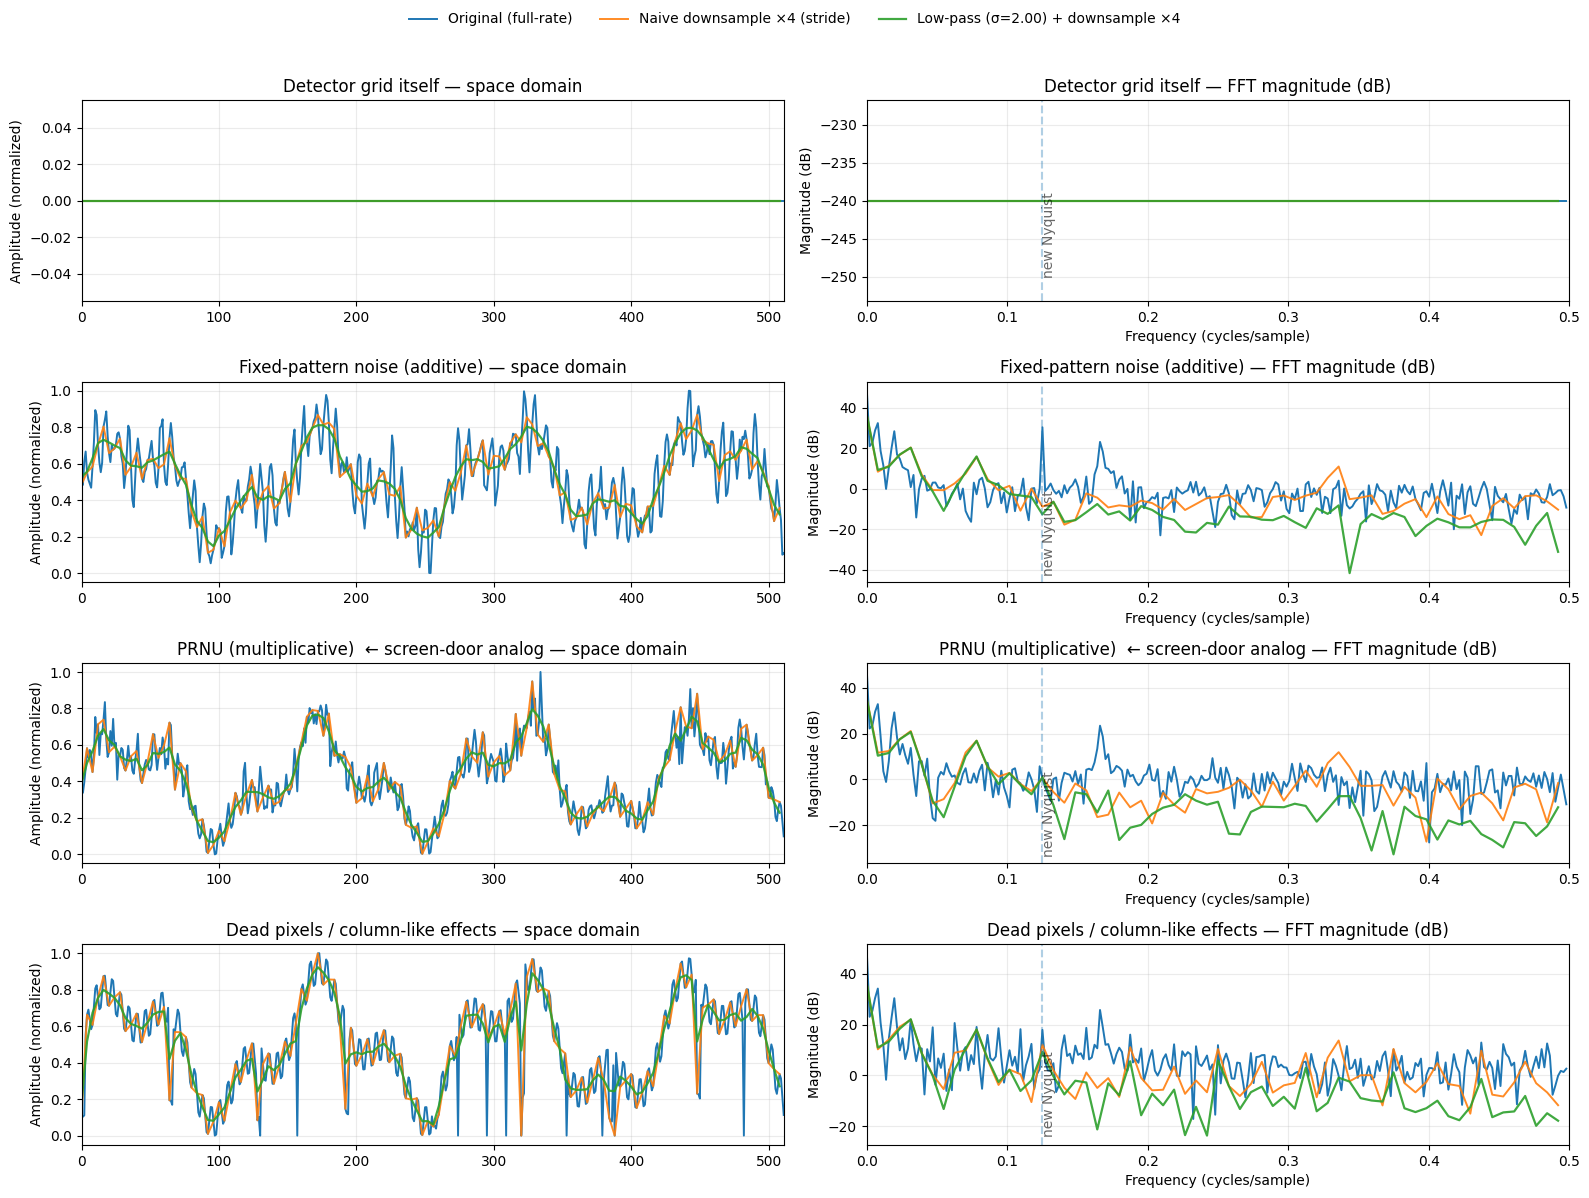

Saved: fpa_1d_aliasing_fft_demo.png
Try changing D=4 and sigma=2.0 to see folding change.


## Running `fpa_artifacts_1d.py`

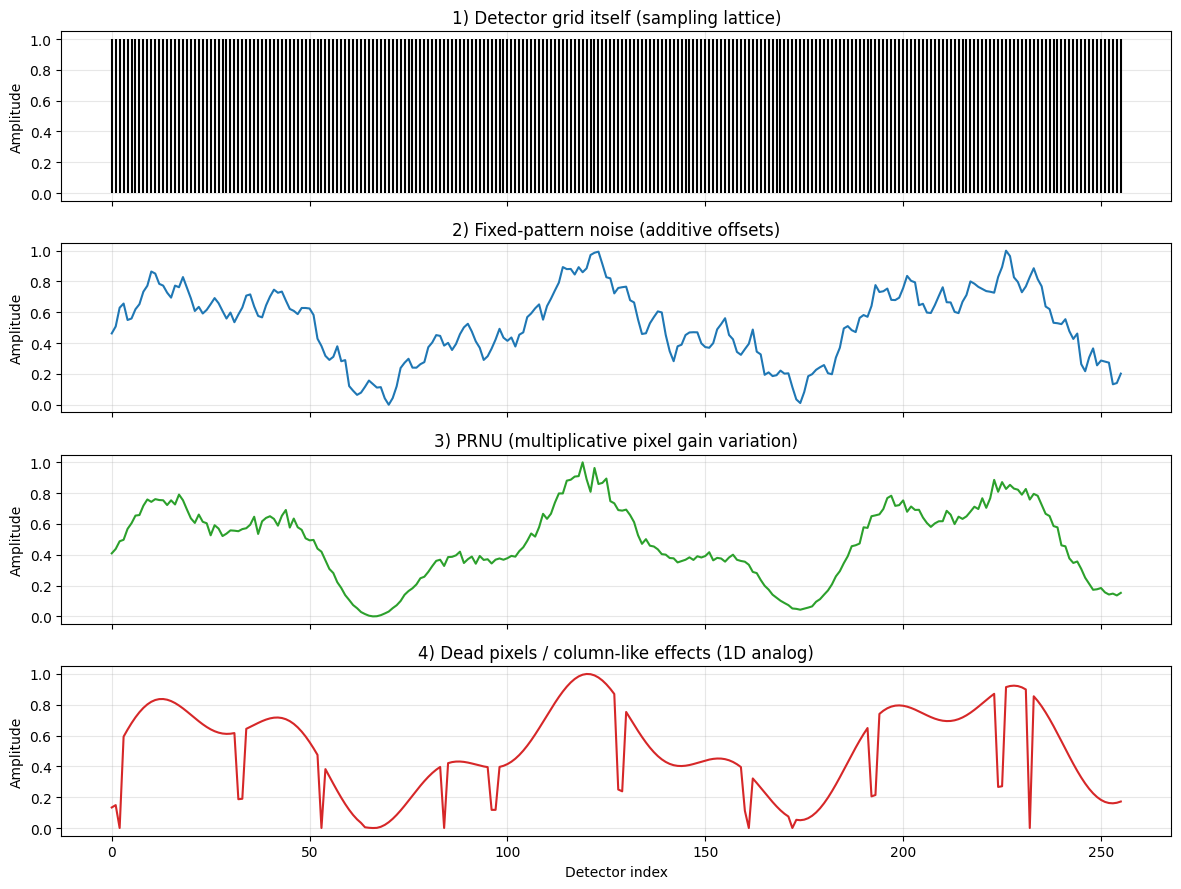

## Running `fpa_artifacts_1d_downsampled.py`

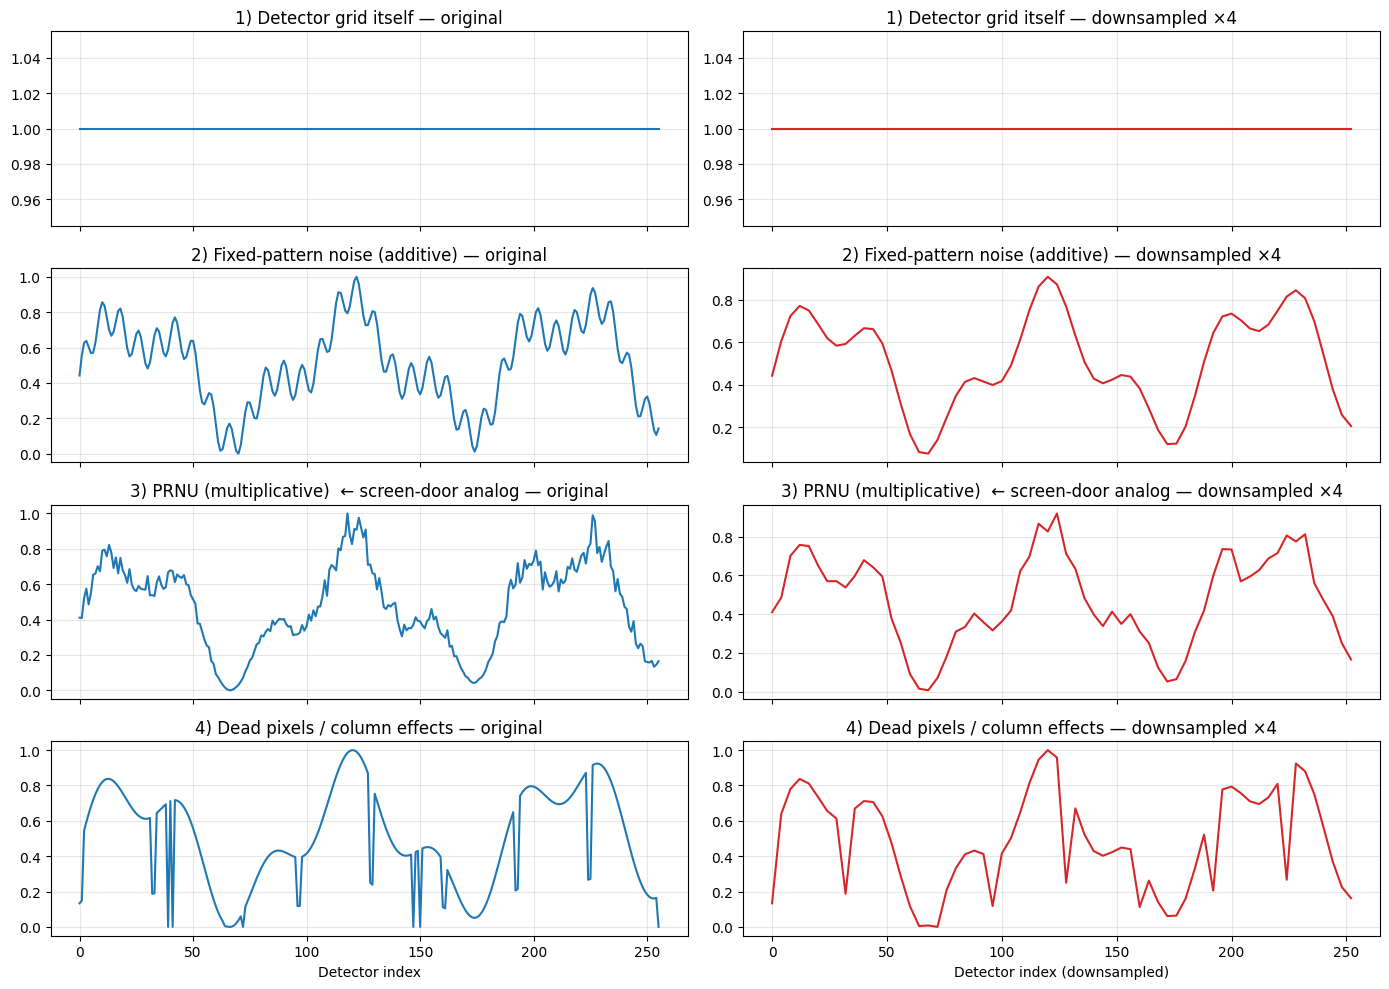

## Running `simulate_screen_door.py`

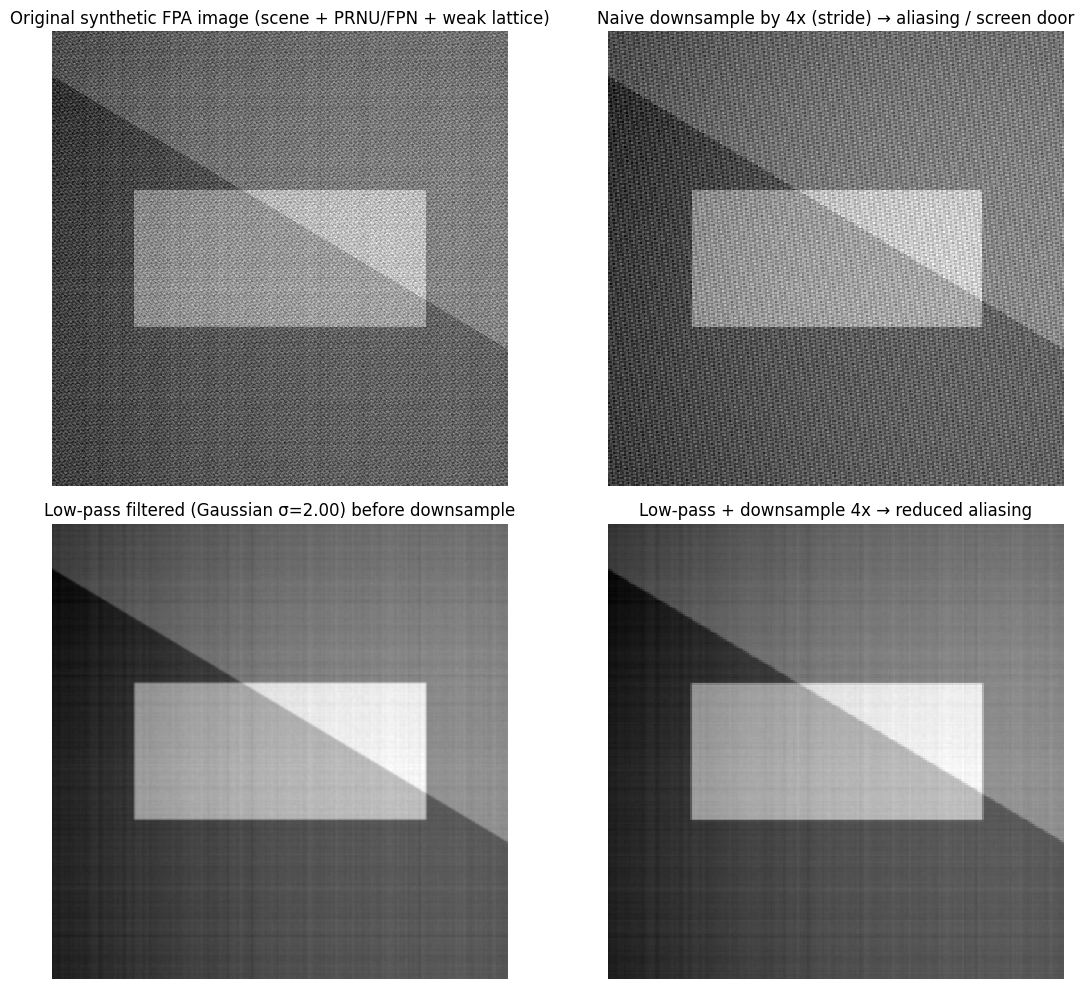


Saved figure to: screen_door_demo.png
Tip: try changing factor=4 and sigma=2.0 to see the effect.



In [3]:
for script in scripts:
    display(Markdown(f'## Running `{script}`'))
    try:
        # Execute the script in an isolated namespace so globals don't leak
        runpy.run_path(script, run_name='__main__')
    except Exception:
        print('Error while running', script)
        traceback.print_exc()
    # Try to render any matplotlib figures the script created
    try:
        plt.show()
    except Exception:
        pass
    plt.close('all')

## Troubleshooting
- If a script uses a non-matplotlib plotting library (e.g., Plotly), its figures might not display automatically. We can add support to capture and display Plotly figures if you want.
- If a script writes plot images to disk, this notebook wont automatically find/display them unless you modify it to look for saved files.
- If you want each script to run in a fresh Python process instead (safer for scripts that change global state), we can change the notebook to call `python` in subprocess and display saved images.